<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Net-radiation-(lw+sw)-at-TOA-netrad_toa" data-toc-modified-id="Net-radiation-(lw+sw)-at-TOA-netrad_toa-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Net radiation (lw+sw) at TOA <code>netrad_toa</code></a></span></li><li><span><a href="#Surface-downward-solar-radiation-swdn_sfc" data-toc-modified-id="Surface-downward-solar-radiation-swdn_sfc-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Surface downward solar radiation <code>swdn_sfc</code></a></span></li><li><span><a href="#Surface-temperature-t_surf" data-toc-modified-id="Surface-temperature-t_surf-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Surface temperature <code>t_surf</code></a></span></li><li><span><a href="#Precipitation-precip" data-toc-modified-id="Precipitation-precip-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Precipitation <code>precip</code></a></span></li><li><span><a href="#Sea-level-pressure-slp" data-toc-modified-id="Sea-level-pressure-slp-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sea level pressure <code>slp</code></a></span></li></ul></div>

# Volcanic Eruption Impact on Climate from FLOR Ensemble: Pinatubo 1991
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [2]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth
import geoxarray

Mon Mar  5 11:14:33 EST 2018


In [4]:
from data_CTL1860 import open_ensemble as get_ctl
from data_pinatubo import open_data as get_volcano
volcano_name = 'Pinatubo'
year_volcano = 1991
#ens = range(1,31)
ens = range(1,24+1)
new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

## Net radiation (lw+sw) at TOA ``netrad_toa``

In [5]:
data_name = 'netrad_toa'
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [6]:
# global mean time series
ts_ctl = da_ctl.geo.fldmean()
ts_volcano = da_volcano.geo.fldmean()
tsa = ts_volcano - ts_ctl
# NH and SH mean time series
tsas = dict(NH=(da_volcano - da_ctl).sel(lat=slice(0,90)).geo.fldmean(),
           SH=(da_volcano - da_ctl).sel(lat=slice(-90,0)).geo.fldmean())

# remove monthly climatology of CTL
ts_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
ts_volcano = ts_volcano.groupby('time.month') - ts_clim
ts_ctl = ts_ctl.groupby('time.month') - ts_clim

<IPython.core.display.Javascript object>


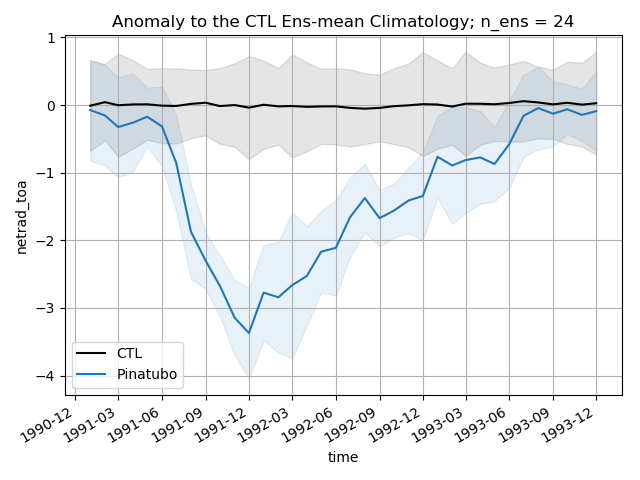

In [7]:
plt.fill_between(ts_ctl.time.to_index().to_pydatetime(),
#     ts_ctl.min('en'),
    ts_ctl.mean('en') - ts_ctl.std('en'),
#     ts_ctl.max('en'),
    ts_ctl.mean('en') + ts_ctl.std('en'),
    color='k', alpha=0.1)
plt.fill_between(ts_volcano.time.to_index().to_pydatetime(),
#     ts_volcano.min('en'),
    ts_volcano.mean('en') - ts_volcano.std('en'),
#     ts_volcano.max('en'),
    ts_volcano.mean('en') + ts_volcano.std('en'),
    color='C0', alpha=0.1)
ts_ctl.mean('en').plot(color='k', label='CTL')
ts_volcano.mean('en').plot(color='C0', label=volcano_name)
plt.legend(loc='lower left', frameon=True)
plt.ylabel(f'{data_name}')
plt.title(f'Anomaly to the CTL Ens-mean Climatology; n_ens = {len(ens)}')
xticksmonth(range(3,13,3))
plt.grid(True)
plt.tight_layout()

<IPython.core.display.Javascript object>


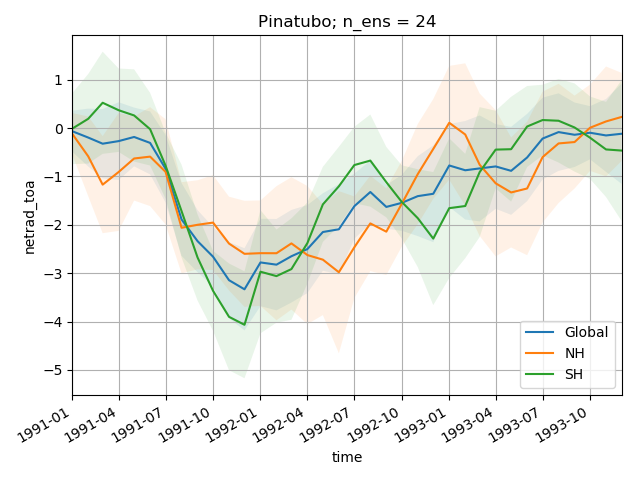

In [8]:
plt.fill_between(tsa.time.to_index().to_pydatetime(),
#     ts_ctl.min('en'),
    tsa.mean('en') - tsa.std('en'),
#     ts_ctl.max('en'),
    tsa.mean('en') + tsa.std('en'),
    alpha=0.1)
tsa.mean('en').plot(label='Global')

for key in ['NH', 'SH']:
    plt.fill_between(tsas[key].time.to_index().to_pydatetime(),
        tsas[key].mean('en') - tsas[key].std('en'),
    #     ts_ctl.max('en'),
        tsas[key].mean('en') + tsas[key].std('en'),
        alpha=0.1)
    tsas[key].mean('en').plot(label=key)

plt.ylabel(f'{data_name}')
plt.title(f'{volcano_name}; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(tsa.time.isel(time=[0,-1]).to_index())
plt.legend(frameon=True, loc='lower right')
plt.tight_layout()

In [9]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

<IPython.core.display.Javascript object>


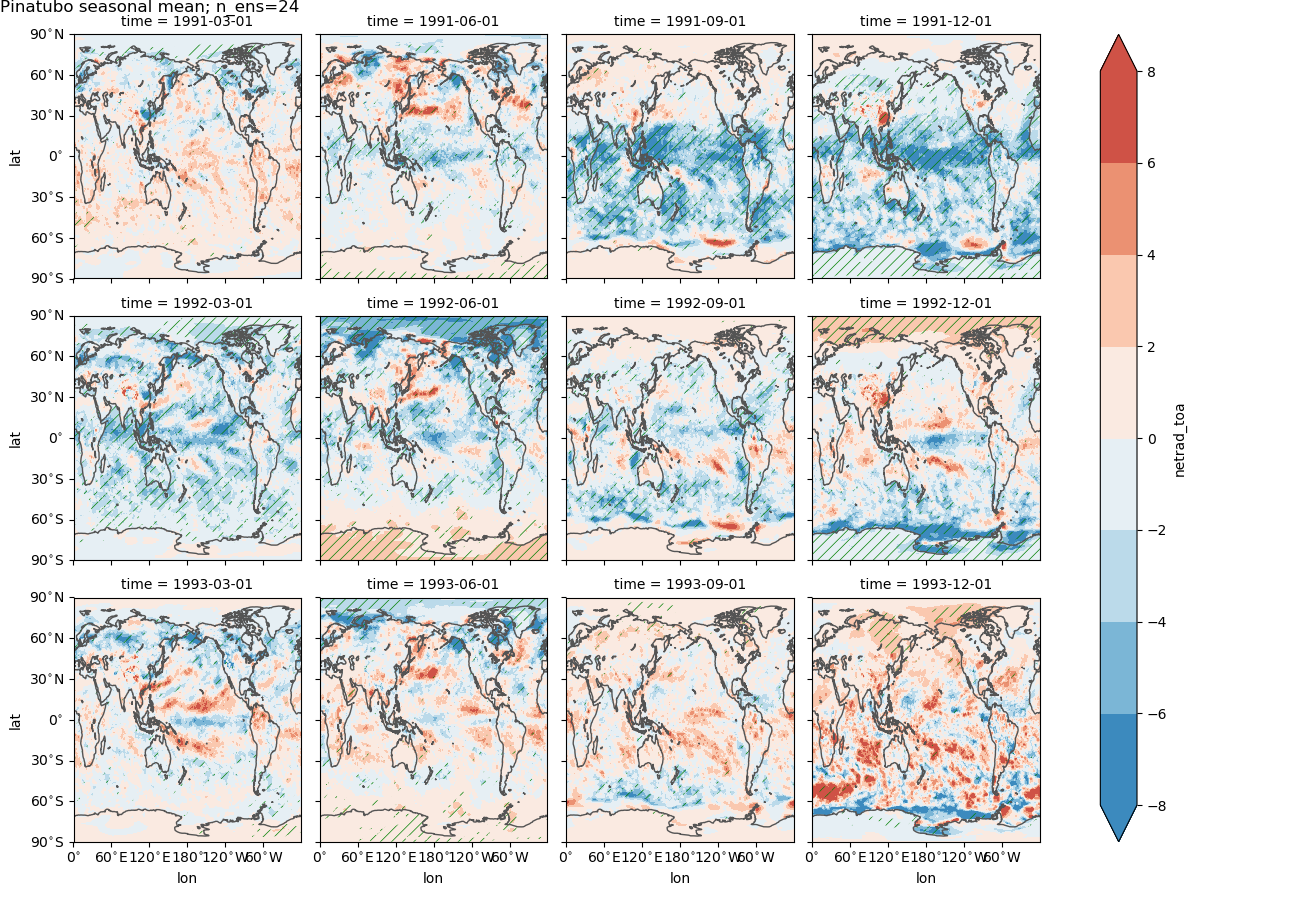

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [10]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name} seasonal mean; n_ens={len(ens)}', x=0, y=1, ha='left')

In [11]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.mean('lon') # zonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

<IPython.core.display.Javascript object>


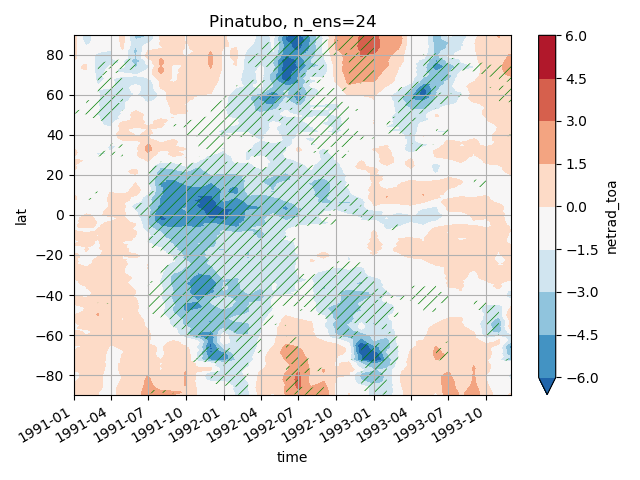

In [12]:
da.plot.contourf(x='time', y='lat', levels=10, robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=['///'], add_colorbar=False, add_labels=False)
plt.gcf().autofmt_xdate()
plt.title(f'{volcano_name}, n_ens={len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

## Surface downward solar radiation ``swdn_sfc``

In [13]:
data_name = 'swdn_sfc'
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [16]:
# global mean time series
ts_ctl = da_ctl.geo.fldmean()
ts_volcano = da_volcano.geo.fldmean()
tsa = ts_volcano - ts_ctl
# NH and SH mean time series
tsas = dict(NH=(da_volcano - da_ctl).sel(lat=slice(0,90)).geo.fldmean(),
           SH=(da_volcano - da_ctl).sel(lat=slice(-90,0)).geo.fldmean())

# remove monthly climatology of CTL
ts_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
ts_volcano = ts_volcano.groupby('time.month') - ts_clim
ts_ctl = ts_ctl.groupby('time.month') - ts_clim

<IPython.core.display.Javascript object>


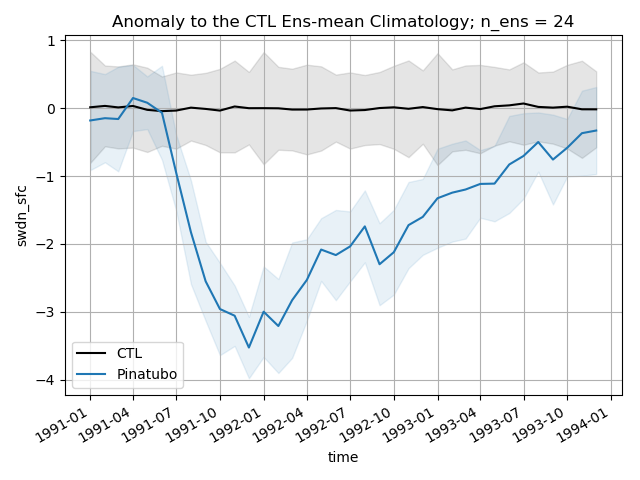

In [15]:
plt.fill_between(ts_ctl.time.to_index().to_pydatetime(),
#     ts_ctl.min('en'),
    ts_ctl.mean('en') - ts_ctl.std('en'),
#     ts_ctl.max('en'),
    ts_ctl.mean('en') + ts_ctl.std('en'),
    color='k', alpha=0.1)
plt.fill_between(ts_volcano.time.to_index().to_pydatetime(),
#     ts_volcano.min('en'),
    ts_volcano.mean('en') - ts_volcano.std('en'),
#     ts_volcano.max('en'),
    ts_volcano.mean('en') + ts_volcano.std('en'),
    color='C0', alpha=0.1)
ts_ctl.mean('en').plot(color='k', label='CTL')
ts_volcano.mean('en').plot(color='C0', label=volcano_name)
plt.legend(loc='lower left', frameon=True)
plt.ylabel(f'{data_name}')
plt.title(f'Anomaly to the CTL Ens-mean Climatology; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

<IPython.core.display.Javascript object>


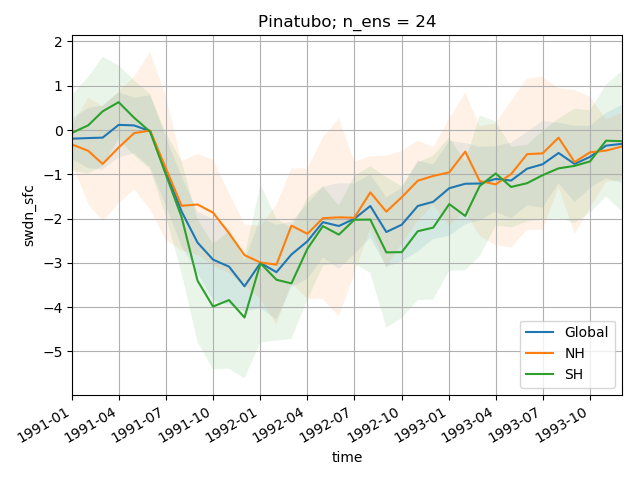

In [17]:
plt.fill_between(tsa.time.to_index().to_pydatetime(),
    tsa.mean('en') - tsa.std('en'),
    tsa.mean('en') + tsa.std('en'),
    alpha=0.1)
tsa.mean('en').plot(label='Global')

for key in ['NH', 'SH']:
    plt.fill_between(tsas[key].time.to_index().to_pydatetime(),
        tsas[key].mean('en') - tsas[key].std('en'),
    #     ts_ctl.max('en'),
        tsas[key].mean('en') + tsas[key].std('en'),
        alpha=0.1)
    tsas[key].mean('en').plot(label=key)

plt.ylabel(f'{data_name}')
plt.title(f'{volcano_name}; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(tsa.isel(time=[0,-1]).time.to_index())
plt.legend(frameon=True, loc='lower right')
plt.tight_layout()

In [18]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<IPython.core.display.Javascript object>


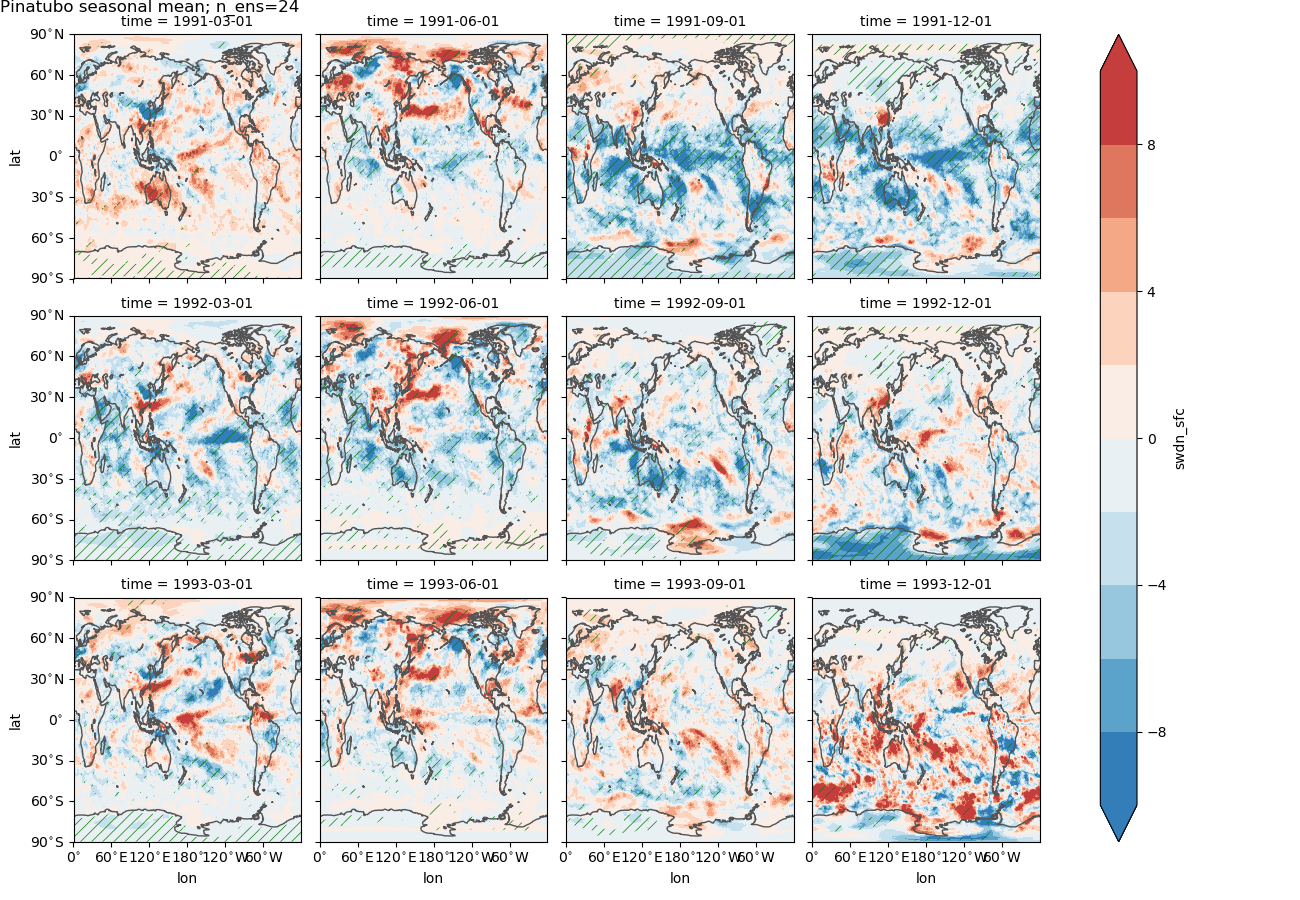

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [19]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name} seasonal mean; n_ens={len(ens)}', x=0, y=1, ha='left')

In [20]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.mean('lon') # zonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<IPython.core.display.Javascript object>


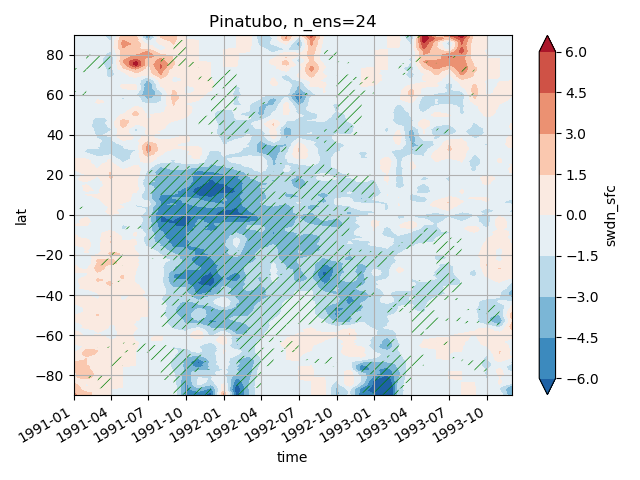

In [21]:
da.plot.contourf(x='time', y='lat', levels=10, robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=['///'], add_colorbar=False, add_labels=False)
plt.gcf().autofmt_xdate()
plt.title(f'{volcano_name}, n_ens={len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

## Surface temperature ``t_surf``

In [22]:
data_name = 't_surf'
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [23]:
# global mean time series
ts_ctl = da_ctl.geo.fldmean()
ts_volcano = da_volcano.geo.fldmean()
tsa = ts_volcano - ts_ctl
# NH and SH mean time series
tsas = dict(NH=(da_volcano - da_ctl).sel(lat=slice(0,90)).geo.fldmean(),
           SH=(da_volcano - da_ctl).sel(lat=slice(-90,0)).geo.fldmean())

# remove monthly climatology of CTL
ts_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
ts_volcano = ts_volcano.groupby('time.month') - ts_clim
ts_ctl = ts_ctl.groupby('time.month') - ts_clim

<IPython.core.display.Javascript object>


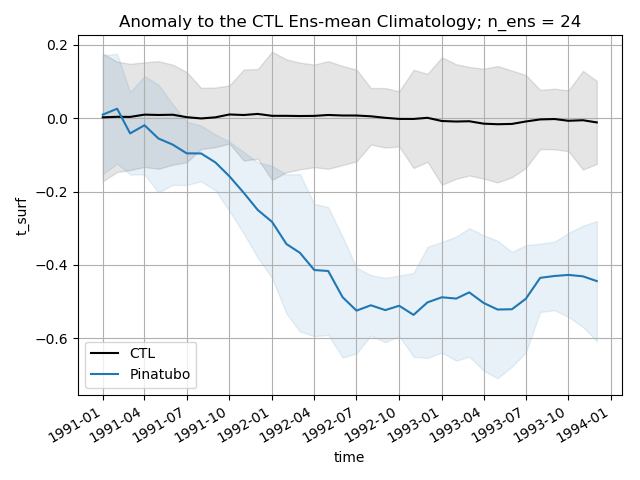

In [24]:
plt.fill_between(ts_ctl.time.to_index().to_pydatetime(),
#     ts_ctl.min('en'),
    ts_ctl.mean('en') - ts_ctl.std('en'),
#     ts_ctl.max('en'),
    ts_ctl.mean('en') + ts_ctl.std('en'),
    color='k', alpha=0.1)
plt.fill_between(ts_volcano.time.to_index().to_pydatetime(),
#     ts_volcano.min('en'),
    ts_volcano.mean('en') - ts_volcano.std('en'),
#     ts_volcano.max('en'),
    ts_volcano.mean('en') + ts_volcano.std('en'),
    color='C0', alpha=0.1)
ts_ctl.mean('en').plot(color='k', label='CTL')
ts_volcano.mean('en').plot(color='C0', label=volcano_name)
plt.legend(loc='lower left', frameon=True)
plt.ylabel(f'{data_name}')
plt.title(f'Anomaly to the CTL Ens-mean Climatology; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

<IPython.core.display.Javascript object>


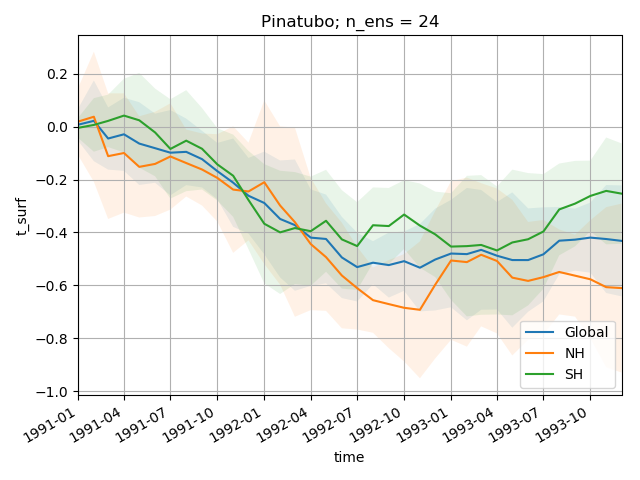

In [25]:
plt.fill_between(tsa.time.to_index().to_pydatetime(),
    tsa.mean('en') - tsa.std('en'),
    tsa.mean('en') + tsa.std('en'),
    alpha=0.1)
tsa.mean('en').plot(label='Global')

for key in ['NH', 'SH']:
    plt.fill_between(tsas[key].time.to_index().to_pydatetime(),
        tsas[key].mean('en') - tsas[key].std('en'),
    #     ts_ctl.max('en'),
        tsas[key].mean('en') + tsas[key].std('en'),
        alpha=0.1)
    tsas[key].mean('en').plot(label=key)

plt.ylabel(f'{data_name}')
plt.title(f'{volcano_name}; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(tsa.isel(time=[0,-1]).time.to_index())
plt.legend(frameon=True, loc='lower right')
plt.tight_layout()

In [26]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

<IPython.core.display.Javascript object>


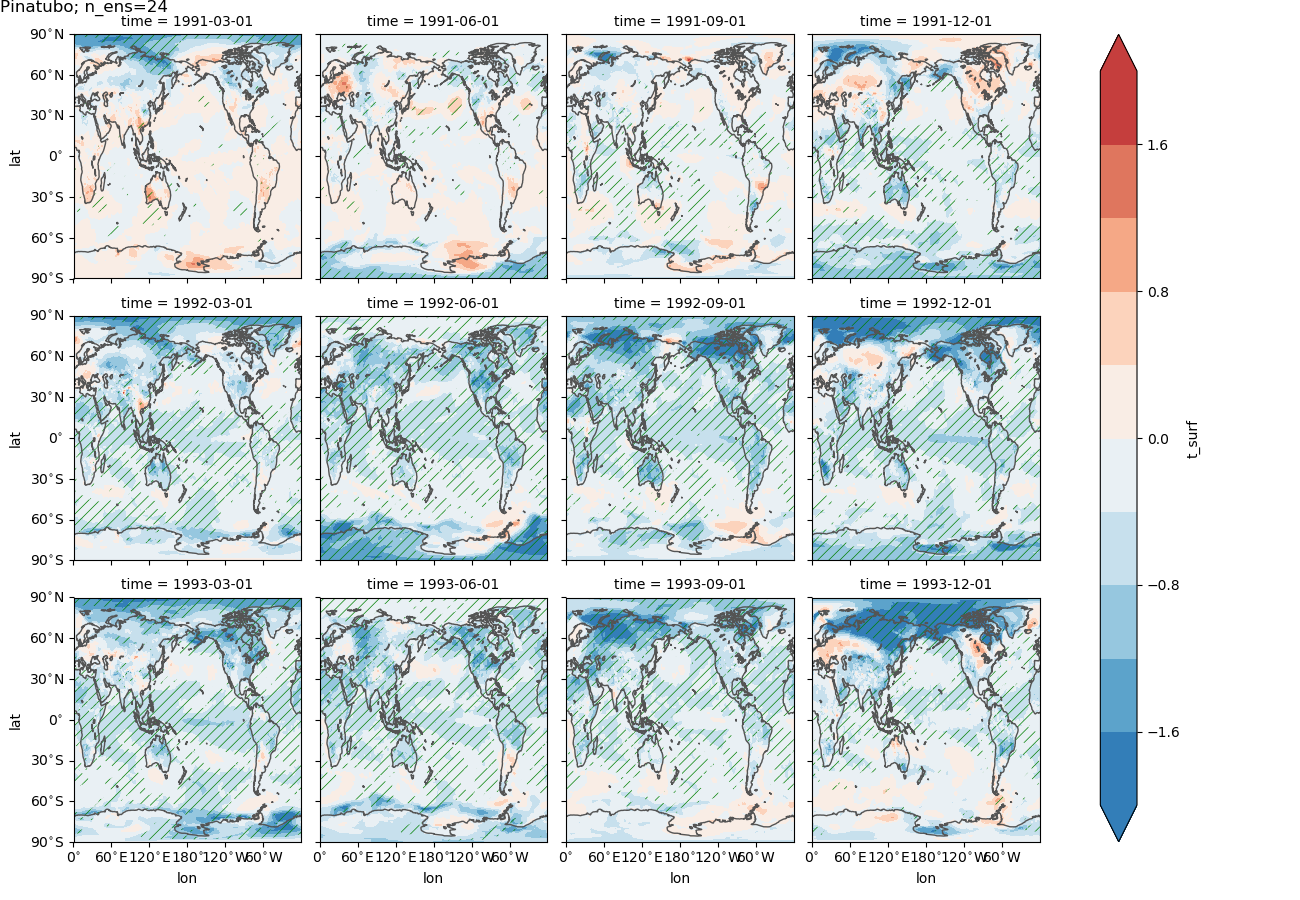

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [27]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name}; n_ens={len(ens)}', x=0, y=1, ha='left')

<IPython.core.display.Javascript object>


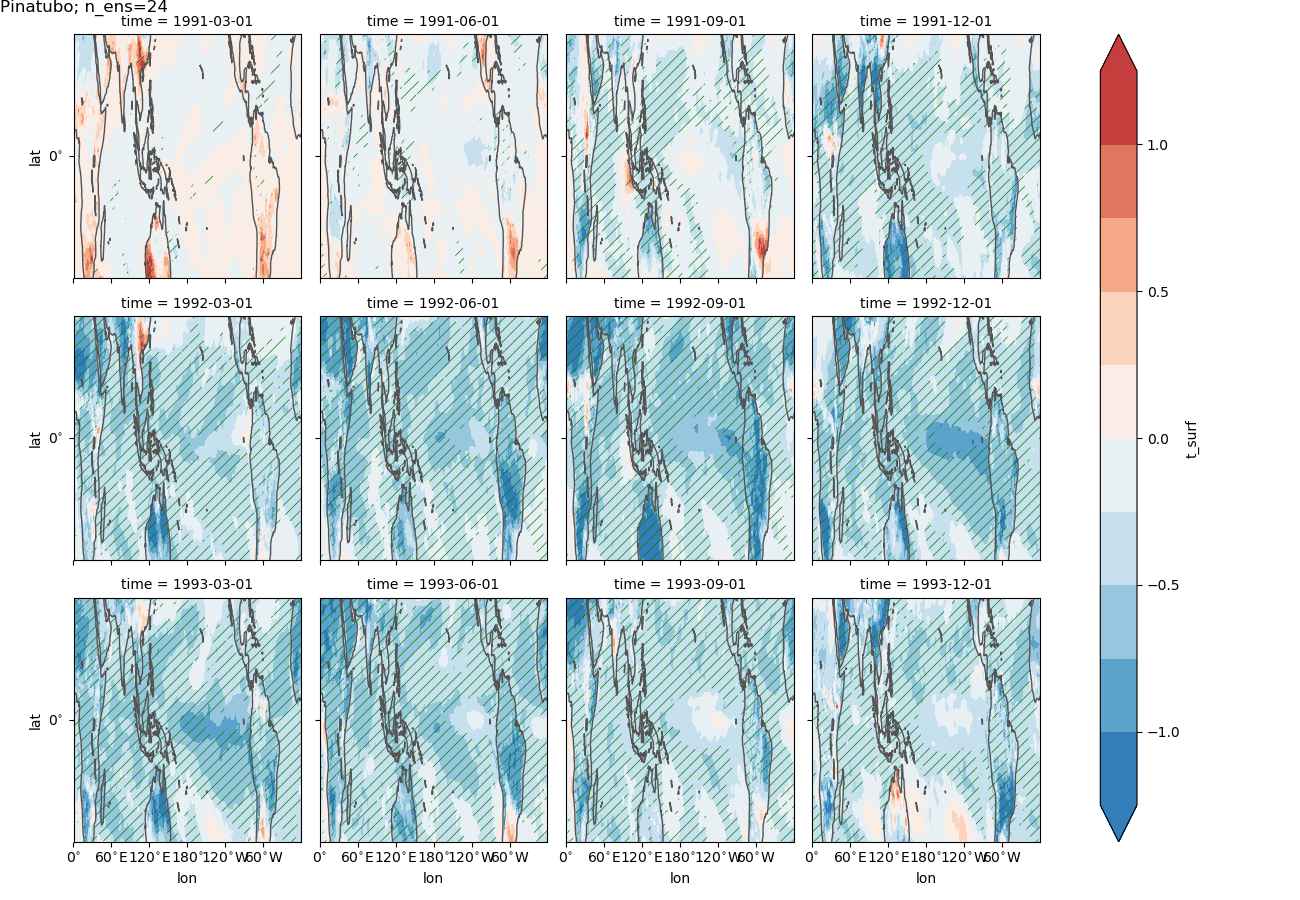

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [28]:
# tropics only
latrange = slice(-30,30)
f = da.sel(lat=latrange).plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).sel(lat=latrange).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name}; n_ens={len(ens)}', x=0, y=1, ha='left')

In [29]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.mean('lon') # zonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

<IPython.core.display.Javascript object>


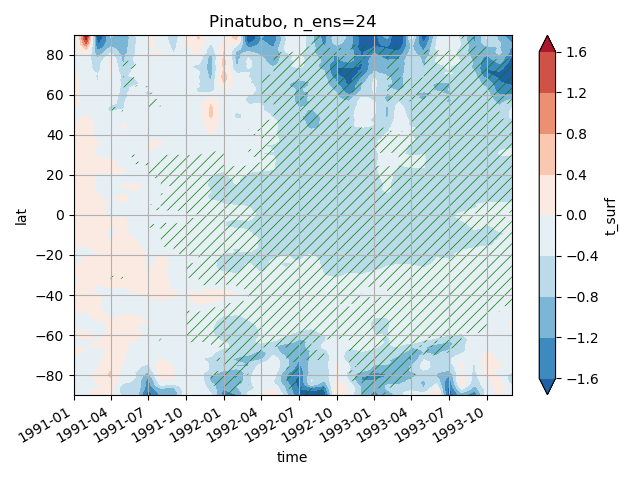

In [30]:
da.plot.contourf(x='time', y='lat', levels=10, robust=True, center=0)
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=['///'], add_colorbar=False, add_labels=False)
plt.gcf().autofmt_xdate()
plt.title(f'{volcano_name}, n_ens={len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

## Precipitation ``precip``

In [31]:
data_name = 'precip'
scale_factor = 3600*24
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load().pipe(lambda x: x*scale_factor)
da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load().pipe(lambda x: x*scale_factor)

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [32]:
# global mean time series
ts_ctl = da_ctl.geo.fldmean()
ts_volcano = da_volcano.geo.fldmean()
tsa = ts_volcano - ts_ctl
# NH and SH mean time series
tsas = dict(NH=(da_volcano - da_ctl).sel(lat=slice(0,90)).geo.fldmean(),
           SH=(da_volcano - da_ctl).sel(lat=slice(-90,0)).geo.fldmean())

# remove monthly climatology of CTL
ts_clim = ts_ctl.groupby('time.month').mean(['time', 'en'])
ts_volcano = ts_volcano.groupby('time.month') - ts_clim
ts_ctl = ts_ctl.groupby('time.month') - ts_clim

<IPython.core.display.Javascript object>


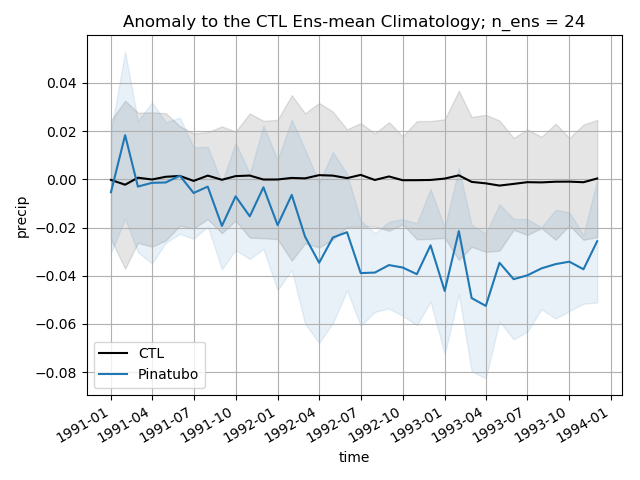

In [33]:
plt.fill_between(ts_ctl.time.to_index().to_pydatetime(),
#     ts_ctl.min('en'),
    ts_ctl.mean('en') - ts_ctl.std('en'),
#     ts_ctl.max('en'),
    ts_ctl.mean('en') + ts_ctl.std('en'),
    color='k', alpha=0.1)
plt.fill_between(ts_volcano.time.to_index().to_pydatetime(),
#     ts_volcano.min('en'),
    ts_volcano.mean('en') - ts_volcano.std('en'),
#     ts_volcano.max('en'),
    ts_volcano.mean('en') + ts_volcano.std('en'),
    color='C0', alpha=0.1)
ts_ctl.mean('en').plot(color='k', label='CTL')
ts_volcano.mean('en').plot(color='C0', label=volcano_name)
plt.legend(loc='lower left', frameon=True)
plt.ylabel(f'{data_name}')
plt.title(f'Anomaly to the CTL Ens-mean Climatology; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

<IPython.core.display.Javascript object>


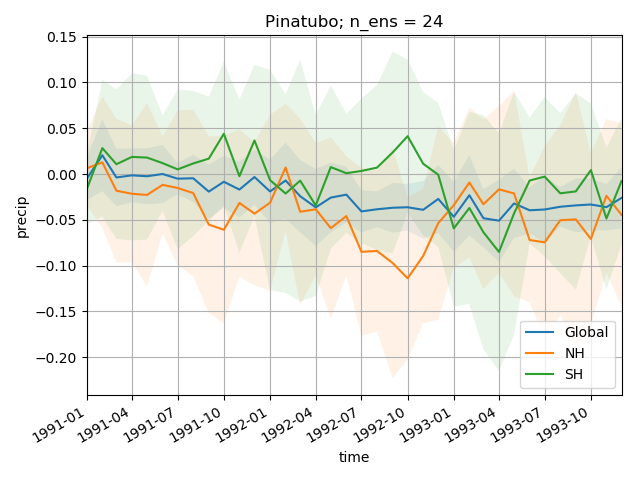

In [34]:
plt.fill_between(tsa.time.to_index().to_pydatetime(),
    tsa.mean('en') - tsa.std('en'),
    tsa.mean('en') + tsa.std('en'),
    alpha=0.1)
tsa.mean('en').plot(label='Global')

for key in ['NH', 'SH']:
    plt.fill_between(tsas[key].time.to_index().to_pydatetime(),
        tsas[key].mean('en') - tsas[key].std('en'),
    #     ts_ctl.max('en'),
        tsas[key].mean('en') + tsas[key].std('en'),
        alpha=0.1)
    tsas[key].mean('en').plot(label=key)

plt.ylabel(f'{data_name}')
plt.title(f'{volcano_name}; n_ens = {len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.xlim(tsa.isel(time=[0,-1]).time.to_index())
plt.legend(frameon=True, loc='lower right')
plt.tight_layout()

In [35]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

<IPython.core.display.Javascript object>


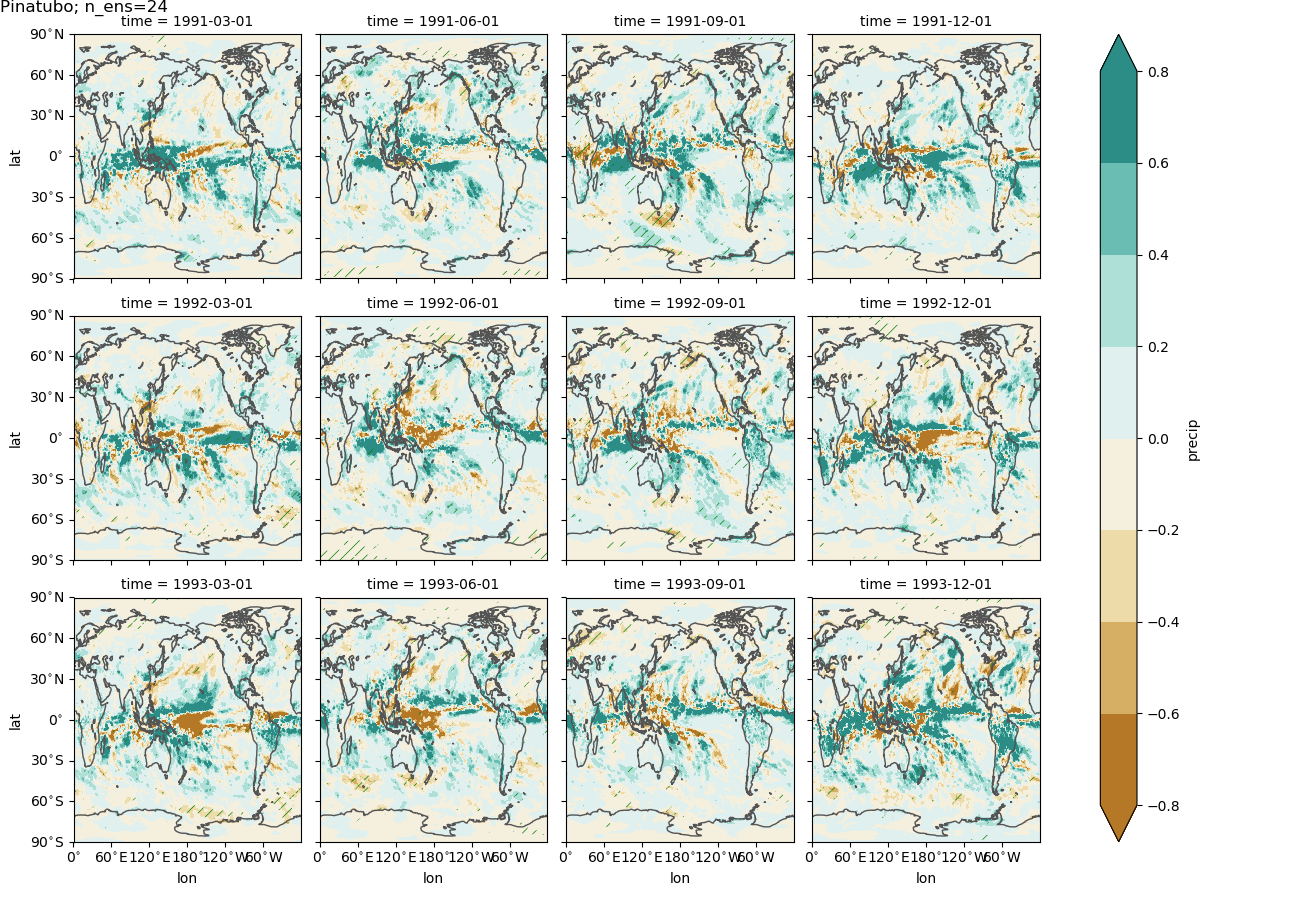

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [36]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both', cmap='BrBG')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name}; n_ens={len(ens)}', x=0, y=1, ha='left')

In [37]:
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.mean('lon') # zonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])

<IPython.core.display.Javascript object>


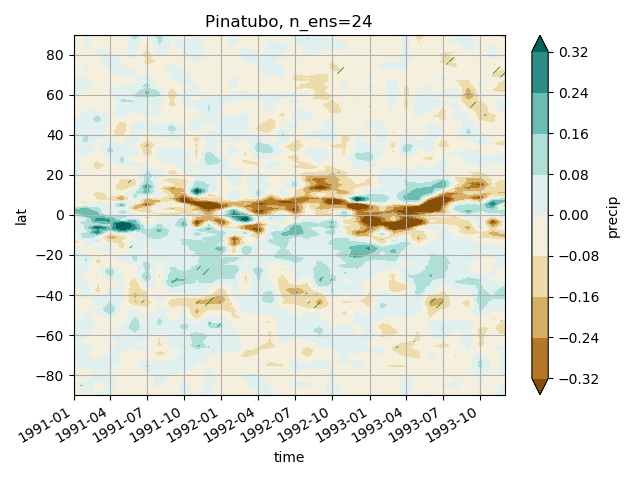

In [38]:
da.plot.contourf(x='time', y='lat', levels=10, robust=True, center=0, cmap='BrBG')
pvalue.where(pvalue<0.05).pipe(lambda x:x*0).plot.contourf(x='time', y='lat',
        colors='None', hatches=['///'], add_colorbar=False, add_labels=False)
plt.gcf().autofmt_xdate()
plt.title(f'{volcano_name}, n_ens={len(ens)}')
xticksmonth(range(1,13,3))
plt.grid(True)
plt.tight_layout()

## Sea level pressure ``slp``

In [39]:
data_name = 'slp'
da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [40]:
# seasonal mean
daa = da_volcano - da_ctl# dims: en, time, grid_xt, grid_yt
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1, None)) # seasonal mean
tt, pp = ttest_1samp(daa, 0)
da = daa.mean('en').load()
pvalue = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in da.dims])

<IPython.core.display.Javascript object>


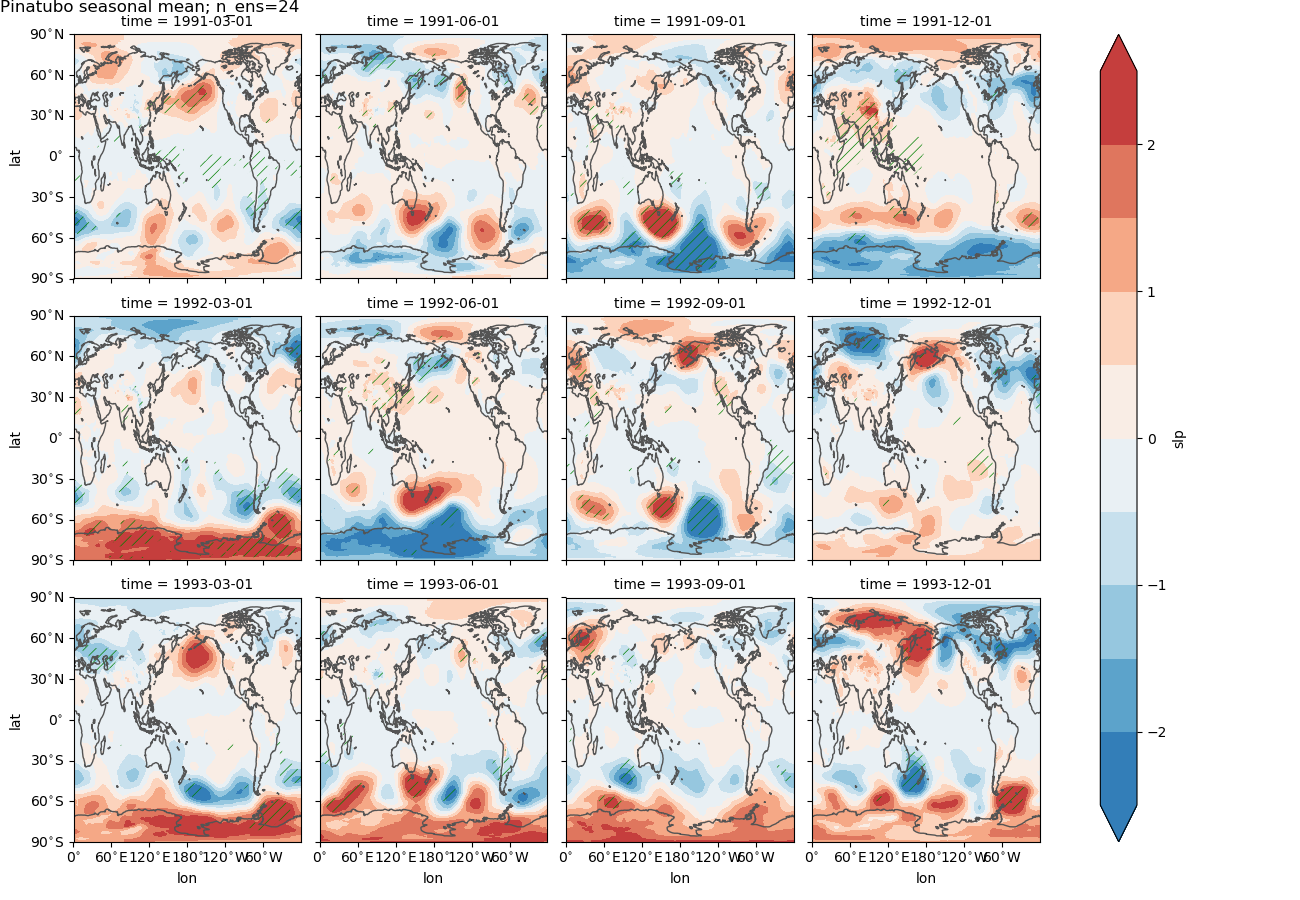

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [41]:
f = da.plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name} seasonal mean; n_ens={len(ens)}', x=0, y=1, ha='left')

<IPython.core.display.Javascript object>


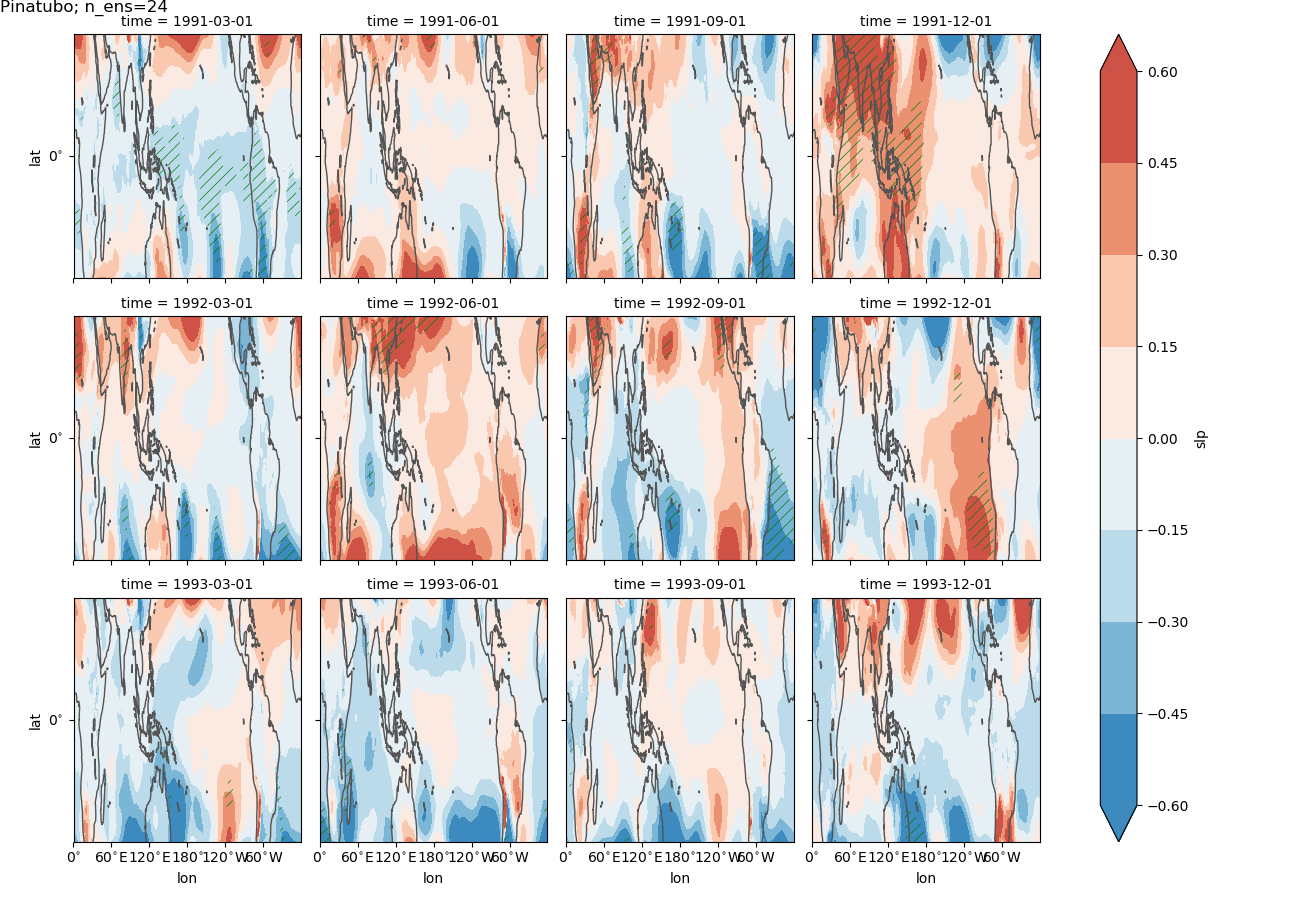

/tigress/wenchang/miniconda3/envs/intel/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


In [42]:
# tropics only
latrange = slice(-30,30)
f = da.sel(lat=latrange).plot.contourf(col='time', col_wrap=4,
    robust=True, levels=10, center=0, extend='both')
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, lw=0.2)
    pp = pvalue.isel(time=ii)
    pp.where(pp<0.05).pipe(lambda x:x*0).sel(lat=latrange).plot.contourf(ax=ax, 
        colors='None', hatches=['///'], facecolor='g', add_colorbar=False, add_labels=False)
plt.suptitle(f'{volcano_name}; n_ens={len(ens)}', x=0, y=1, ha='left')